In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [2]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data_train.shape

(550068, 12)

In [4]:
data_test.shape

(233599, 11)

In [5]:
data=pd.concat([data_train,data_test],axis=0)

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
data.shape

(783667, 12)

In [8]:
data.iloc[:,::-1]

,Purchase,Product_Category_3,Product_Category_2,Product_Category_1,Marital_Status,Stay_In_Current_City_Years,City_Category,Occupation,Age,Gender,Product_ID,User_ID
0,8370.0,NaN,NaN,3,0,2,A,10,0-17,F,P00069042,1000001
1,15200.0,14.0,6.0,1,0,2,A,10,0-17,F,P00248942,1000001
2,1422.0,NaN,NaN,12,0,2,A,10,0-17,F,P00087842,1000001
3,1057.0,NaN,14.0,12,0,2,A,10,0-17,F,P00085442,1000001
4,7969.0,NaN,NaN,8,0,4+,C,16,55+,M,P00285442,1000002
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,NaN,NaN,NaN,8,1,4+,B,15,26-35,F,P00118942,1006036
233595,NaN,NaN,8.0,5,1,4+,B,15,26-35,F,P00254642,1006036
233596,NaN,12.0,5.0,1,1,4+,B,15,26-35,F,P00031842,1006036
233597,NaN,NaN,16.0,10,0,4+,C,1,46-50,F,P00124742,1006037


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
[columns for columns in data.columns if data[columns].isnull().sum()>1]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [12]:
# plt.figure(figsize=(11,7))
# # sns.heatmap(data.isna(),yticklabels=False)

In [13]:
#user id not used delete 
data.drop(["User_ID"],axis=1,inplace=True)

In [14]:
null_val=data.isna().sum().sort_values(ascending=False).reset_index()
null_val

,index,0
0,Product_Category_3,545809
1,Product_Category_2,245982
2,Purchase,233599
3,Product_ID,0
4,Gender,0
5,Age,0
6,Occupation,0
7,City_Category,0
8,Stay_In_Current_City_Years,0
9,Marital_Status,0


In [15]:
data["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [16]:
data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
#our value contains descrete feature
data["Product_Category_2"].fillna(data["Product_Category_2"].mode()[0],inplace=True)

In [18]:
data["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [19]:
data["Product_Category_3"]=data["Product_Category_3"].fillna(data["Product_Category_3"].mode()[0])

In [20]:
data.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [21]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


### fixing categorical_feature

In [22]:
data["Gender"].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [23]:
data["Gender"]=data["Gender"].map({"F":0,"M":1})

In [24]:
data["Gender"][:5]

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [25]:
#city category
data["City_Category"].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [26]:
data["City_Category"]=pd.get_dummies(data["City_Category"])

In [27]:
data["City_Category"].value_counts()

0    573423
1    210244
Name: City_Category, dtype: int64

In [28]:
data["Age"].dtype

dtype('O')

In [29]:
data["Age"].value_counts().sort_values(ascending=True)

0-17      21334
55+       30579
51-55     54784
46-50     65278
18-25    141953
36-45    156724
26-35    313015
Name: Age, dtype: int64

In [30]:
data["Age"]=data["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})

In [31]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,0,4+,0,8,8.0,16.0,7969.0


In [32]:
data["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [33]:
data["Stay_In_Current_City_Years"]=data["Stay_In_Current_City_Years"].str.replace("+","")

In [34]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,0,4,0,8,8.0,16.0,7969.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  uint8  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(2), uint8(1)
memory usage: 66.5+ MB


In [36]:
data["Stay_In_Current_City_Years"]=data["Stay_In_Current_City_Years"].astype(int)
data["City_Category"]=data["City_Category"].astype(int)

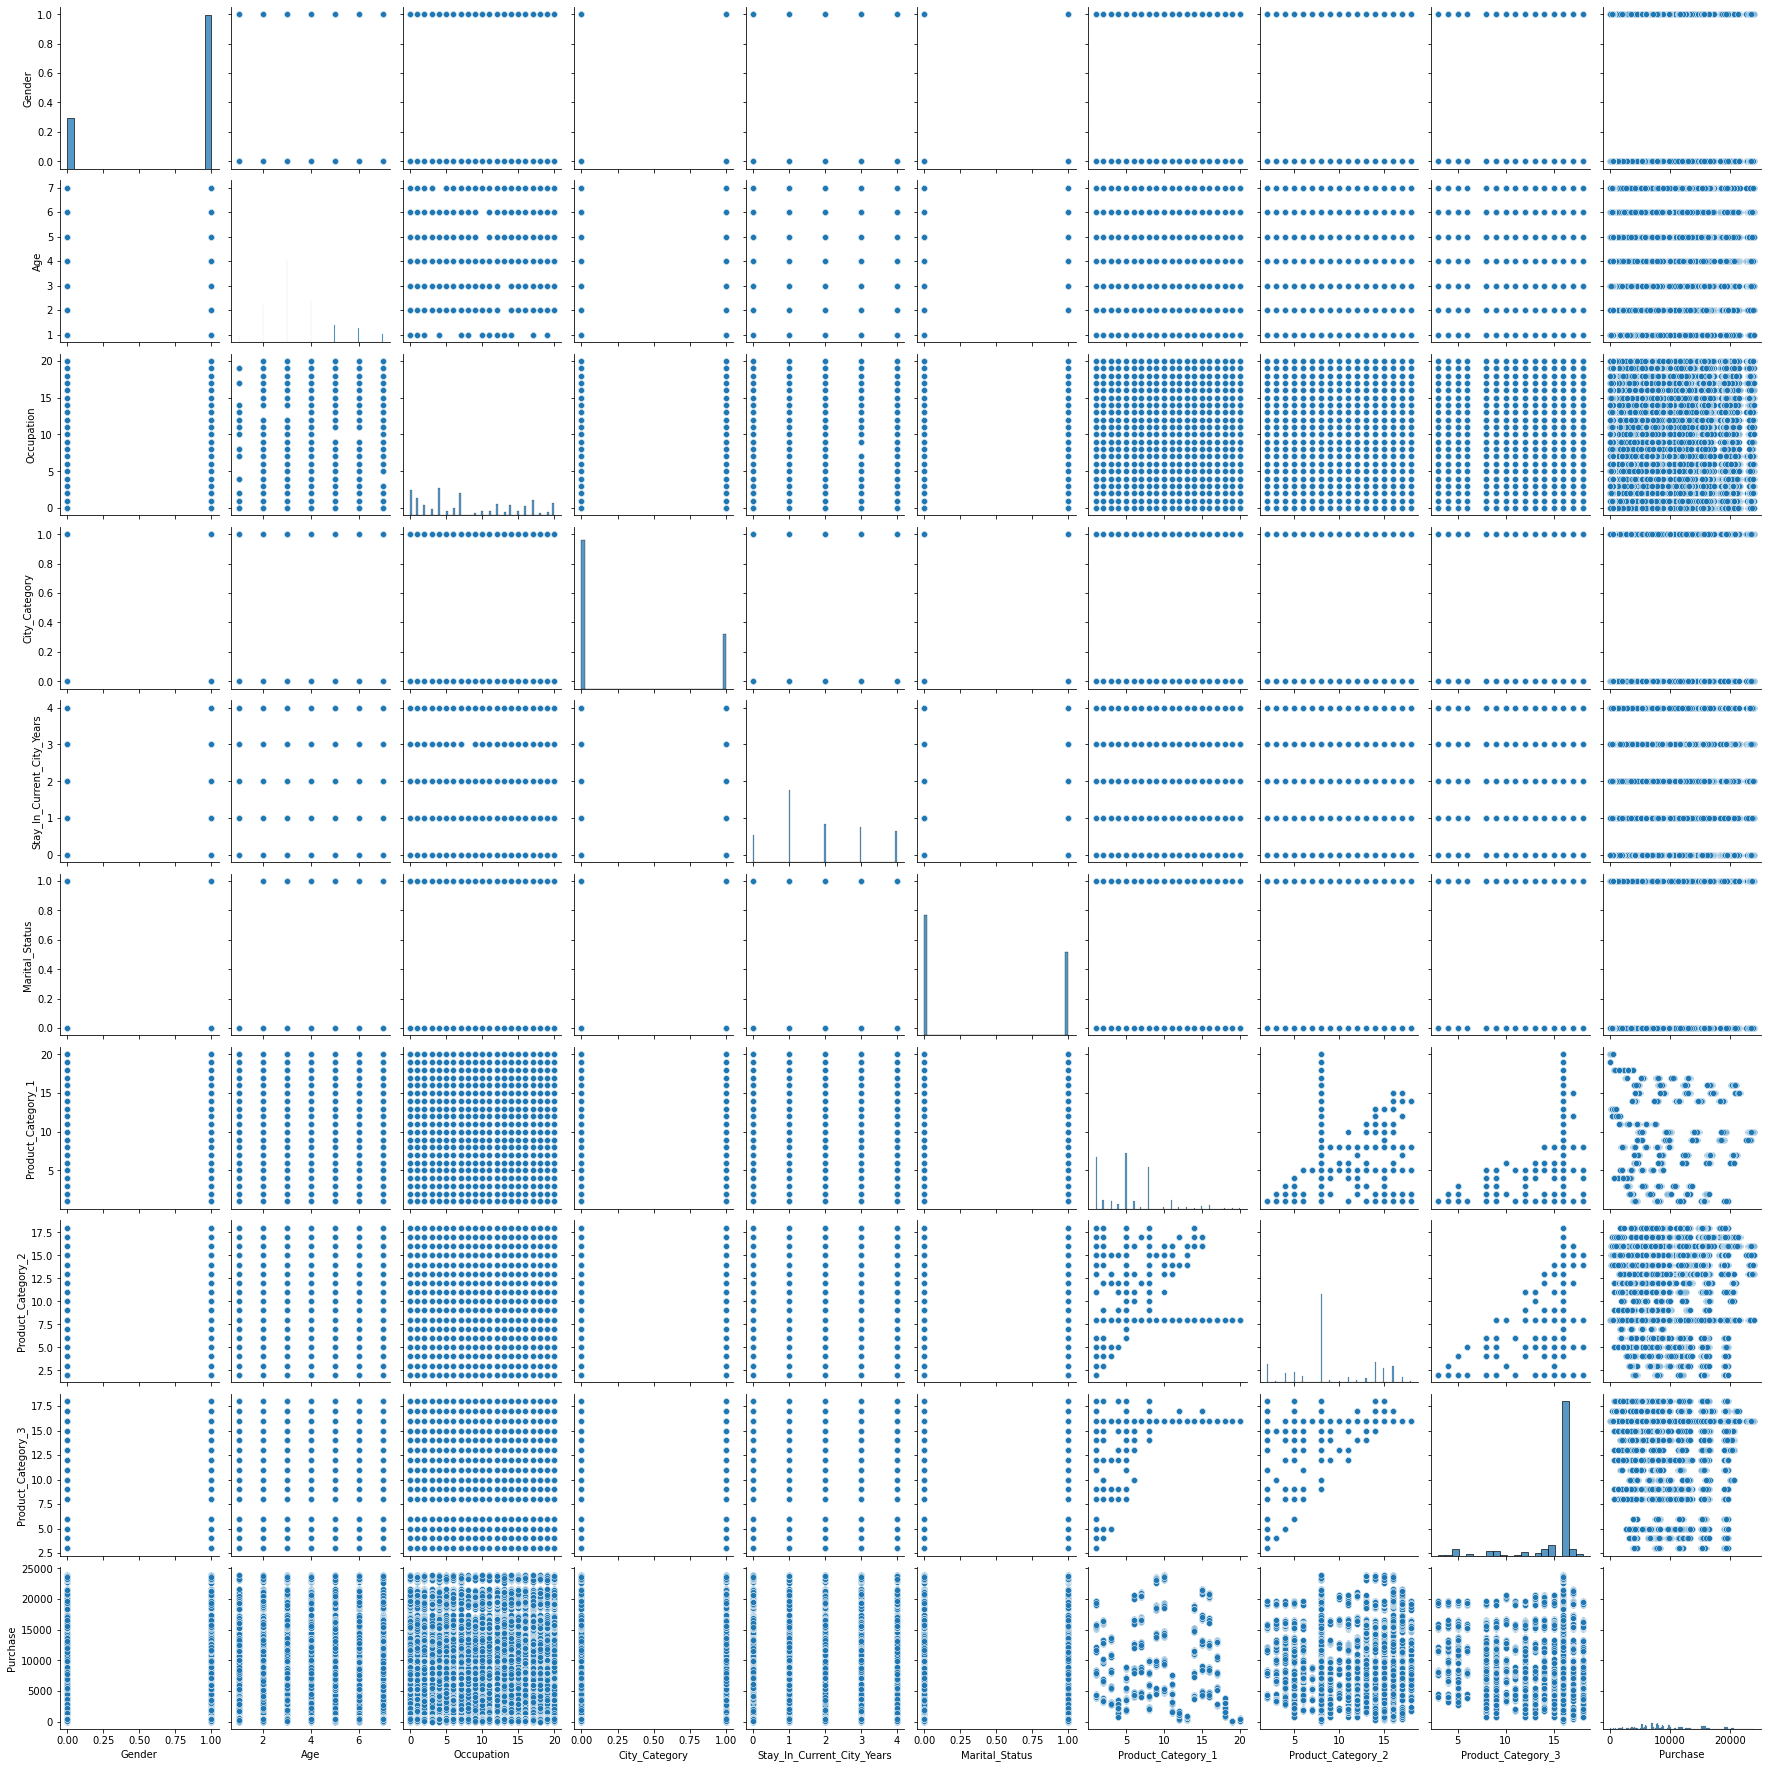

In [37]:
sns.pairplot(data)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

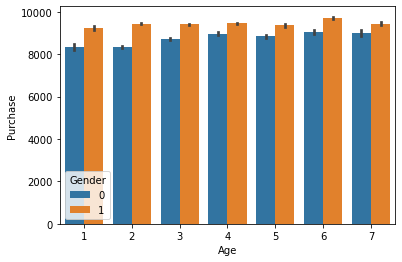

In [38]:
#age vs purchased visualisation
sns.barplot(x="Age",y="Purchase",hue="Gender",data=data)

In [39]:
#purchasing of men is higher than that of women

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

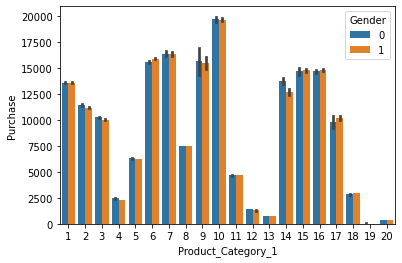

In [40]:
sns.barplot(x="Product_Category_1",y="Purchase",hue="Gender",data=data)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

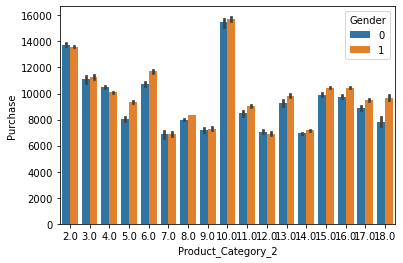

In [41]:
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data=data)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

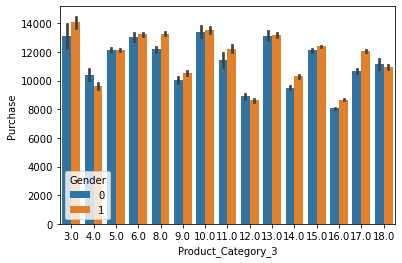

In [42]:
sns.barplot(x="Product_Category_3",y="Purchase",hue="Gender",data=data)

In [43]:
data.corr()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004758,0.116505,0.006204,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346
Age,-0.004758,1.000000,0.090882,-0.096426,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839
Occupation,0.116505,0.090882,1.000000,-0.023772,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833
City_Category,0.006204,-0.096426,-0.023772,1.000000,-0.023769,-0.032790,0.017750,0.004857,0.016832,-0.042465
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,-0.023769,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422
Marital_Status,-0.010945,0.310747,0.023563,-0.032790,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463
Product_Category_1,-0.046208,0.060336,-0.008441,0.017750,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703
Product_Category_2,-0.011851,0.041716,0.001501,0.004857,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651
Product_Category_3,-0.006651,0.036721,-0.001576,0.016832,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945
Purchase,0.060346,0.015839,0.020833,-0.042465,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


<AxesSubplot:>

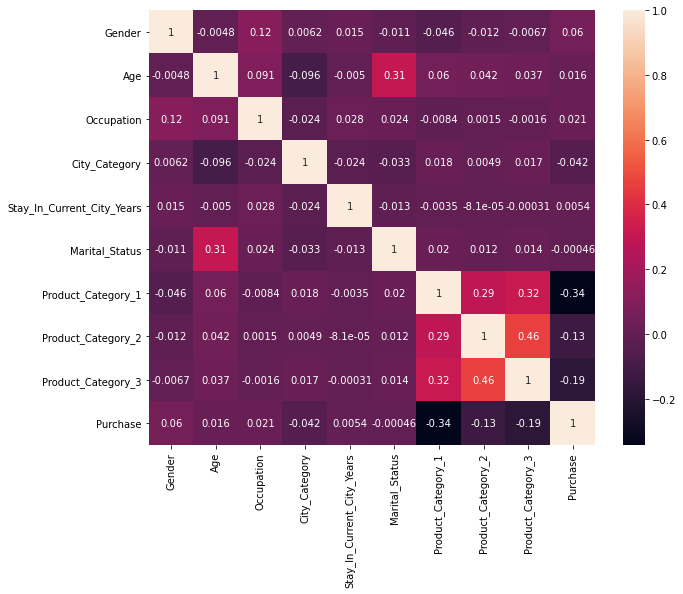

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [46]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [48]:
data.drop(["Product_ID"],axis=1,inplace=True)

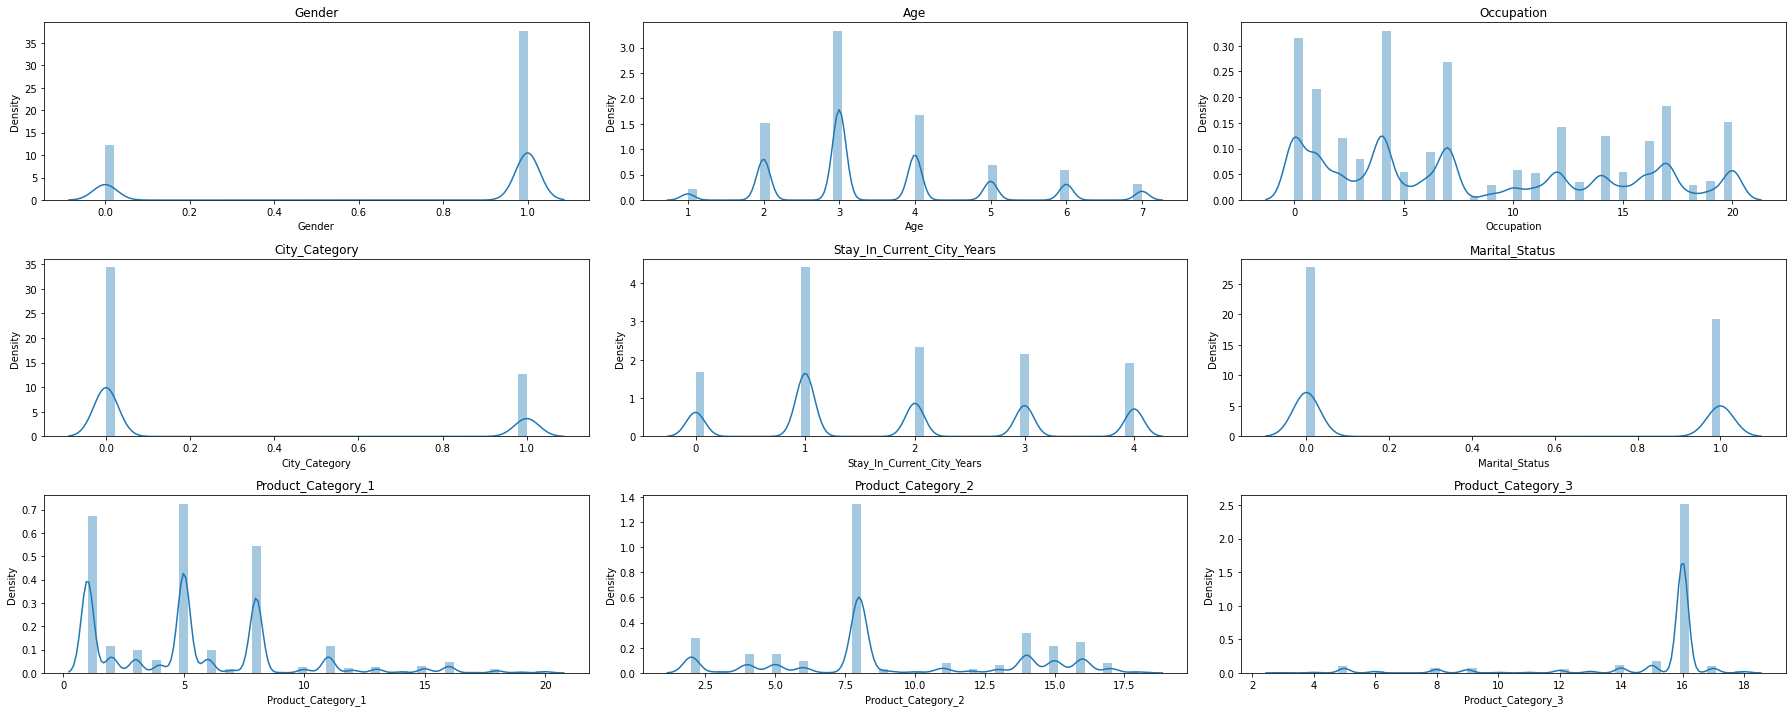

In [58]:
plt.figure(figsize=(25,10))
columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']
plotno=1
for col in data[columns]:
    if plotno<=9:
        ax=plt.subplot(3,3,plotno)
        sns.distplot(data[col],ax=ax)
        plt.title(col)
    plotno+=1
plt.tight_layout()

In [59]:
data_train=data[~data["Purchase"].isnull()]
data_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,0,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,0,1,1,20,8.0,16.0,368.0
550064,0,3,1,0,3,0,20,8.0,16.0,371.0
550065,0,3,15,0,4,1,20,8.0,16.0,137.0
550066,0,7,1,0,2,0,20,8.0,16.0,365.0


In [60]:
x=data_train.drop(["Purchase"],axis=1)
y=data_train.Purchase

x.shape,y.shape

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [63]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [64]:
x_train_scaled[0]

array([ 0.57183532,  0.37160547, -0.16508218, -0.6062538 , -0.66654641,
       -0.83379575,  0.65996761, -0.29339373,  0.36880394])

In [65]:
x_test_scaled[0]

array([ 0.57183532,  1.84816694,  1.67519074, -0.6062538 ,  0.88450519,
       -0.83379575, -1.11881282, -1.69068216,  0.36880394])

This is all about feature engineering and eda and next step is variance inflation factor,feature selection,model building,hyperparameter tuning,evaluating performance,saving,flask api web app and deploying